In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
labels = '/content/drive/MyDrive/datasets'

Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/datasets/train/*')
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5341 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  shuffle=True,
  steps_per_epoch=len(training_set)//4,
  validation_steps=len(test_set)//4
)


Epoch 1/15
133/133 [==============================] - 344s 3s/step - loss: 0.3244 - accuracy: 0.8887 - val_loss: 0.7960 - val_accuracy: 0.7500
Epoch 2/15
133/133 [==============================] - 224s 2s/step - loss: 0.2495 - accuracy: 0.9158 - val_loss: 0.4278 - val_accuracy: 0.8750
Epoch 3/15
133/133 [==============================] - 172s 1s/step - loss: 0.1572 - accuracy: 0.9398 - val_loss: 0.4865 - val_accuracy: 0.8562
Epoch 4/15
133/133 [==============================] - 127s 960ms/step - loss: 0.1193 - accuracy: 0.9534 - val_loss: 0.3323 - val_accuracy: 0.9062
Epoch 5/15
133/133 [==============================] - 130s 980ms/step - loss: 0.1430 - accuracy: 0.9564 - val_loss: 0.2841 - val_accuracy: 0.9125
Epoch 6/15
133/133 [==============================] - 83s 625ms/step - loss: 0.1109 - accuracy: 0.9586 - val_loss: 0.4358 - val_accuracy: 0.8875
Epoch 7/15
133/133 [==============================] - 74s 553ms/step - loss: 0.1312 - accuracy: 0.9654 - val_loss: 0.2175 - val_accura

In [ ]:
import matplotlib.pyplot as plt


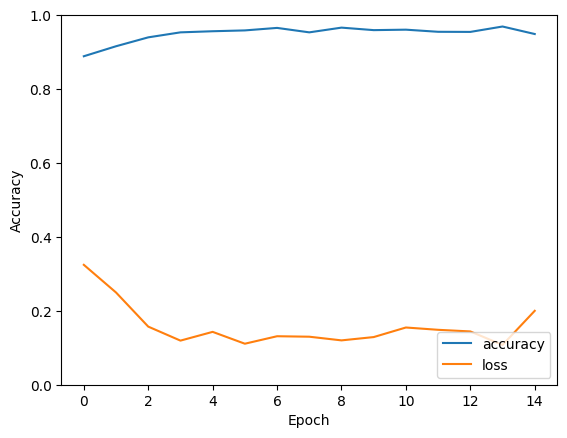

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray1.h5')

In [ ]:
from keras.models import load_model


In [ ]:
from keras.preprocessing import image


In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np


In [ ]:
model=load_model('chest_xray1.h5')

In [ ]:
path = "/content/drive/MyDrive/datasets/val/NORMAL/NORMAL2-IM-1440-0001.jpeg"
img=image.load_img(path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal...")

1/1 [==============================] - 0s 156ms/step
Result is Normal...


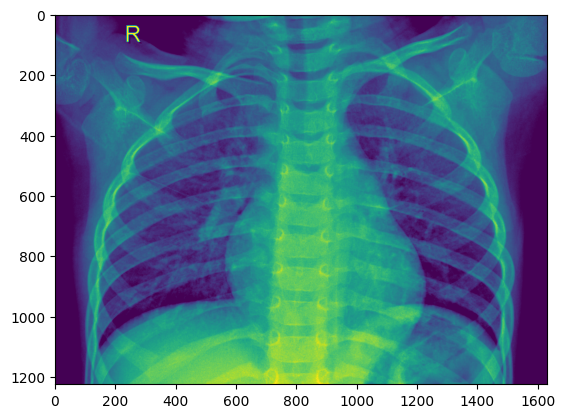

In [ ]:
img = plt.imread(path)
plt.imshow(img)
plt.show()